# Outliers

An outlier is a data point that is significantly different from the remaining data.

## Machine learning models and outliers

A research article suggests that neural networks could also be sensitive to outliers, provided the number of outliers is high and the deviation is also high. I would argue that if the number of outliers is high (> 15% as suggested in the article), then they are no longer outliers, but rather a fair representation of that variable. A link to this article can be found in the "Additional reading resources" lecture at the end of this section of the course.

## Identifying outliers

Outlier analysis and anomaly detection is a huge field of research devoted to optimising methods and creating new algorithms to reliably identify outliers. There are plenty of ways to detect outliers in different situations. These are mostly targeted to identify outliers when those are the observations that we want to focus on, for example, fraudulent credit card activity.

## Extreme Value Analysis

- outliers = mean +/- 3* std.

If the variable is skewed, a general approach is to calculate the quantiles, and then the inter-quartile range (IQR):

- IQR = 75th quantile - 25th quantile

An outlier will sit outside the following upper and lower boundaries:

- Upper boundary = 75th quantile + (IQR * 1.5)

- Lower boundary = 25th quantile - (IQR * 1.5)

or for extreme cases:

- Upper boundary = 75th quantile + (IQR * 3)

- Lower boundary = 25th quantile - (IQR * 3)

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

# dataset for the demo
from sklearn.datasets import fetch_california_housing

In [3]:
# load the California House price dataset from Scikit-learn
X, Y = fetch_california_housing(return_X_y=True, as_frame=True)

# remove the column of lat and lon
X.drop(["Latitude", "Longitude"], axis=1, inplace=True)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [4]:
X['MedInc'] = np.log(X['MedInc'])
X["AveRooms"] = 1 / X["AveRooms"]
X["AveBedrms"] = 1 / X["AveBedrms"]
X["AveOccup"] = 1 / X["AveOccup"]
X['Population'] = np.log(X['Population'])

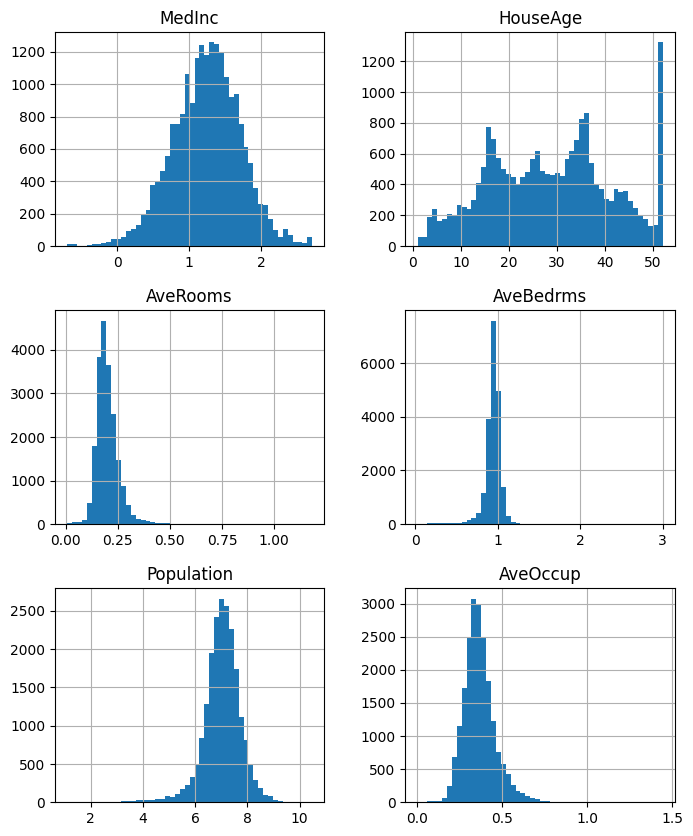

In [5]:
X.hist(bins=50, figsize=(8, 10))
plt.show()

## Variable distribution

In normally distributed variables, outliers are those values that lie beyond the mean, plus or minus 3 times the standard deviation.

If the variables are skewed, however, we find outliers using the **inter-quantile range**. In order to decide which method to use to detect outliers, we first need to know the distribution of the variable.

## Q-Q plots and Boxplot

We can use histograms and Q-Q plots to determine if the variable is normally distributed. We can also use boxplots to directly visualise the outliers. Boxplots are a standard way of displaying the distribution of a variable, utilising the first quartile, the median, the third quartile, and the whiskers.

Looking at a boxplot, you can easily identify:

- The median, indicated by the line within the box.

- The inter-quantile range (IQR), the box itself.

- The quantiles, the 25th (Q1) is the lower and the 75th (Q3) the upper end of the box.

- The wiskers, which extend to: 

  -- top whisker: Q3 + 1.5 x IQR

  -- bottom whisker: Q1 -1.5 x IQR

Any value sitting outside the whiskers is considered an outlier. 

Let's look at some examples below.

In [6]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

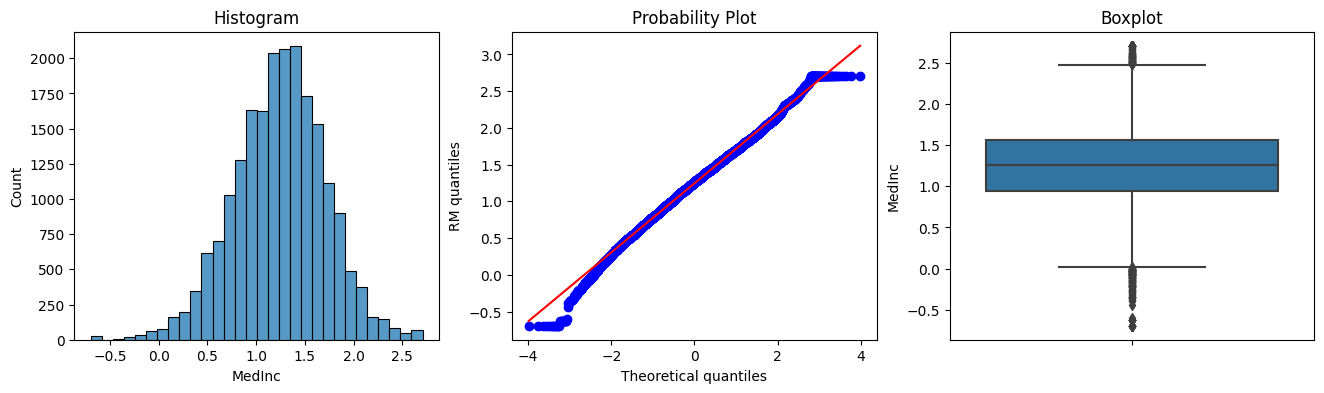

In [7]:
diagnostic_plots(X, 'MedInc')

From the histogram and the Q-Q plot, we see that the variable Median income shows **roughly a normal distribution**. The values deviate from the expected distribution towards the extremes. 

In the boxplot, we see **some outliers**, that is, the dots outside of the whiskers at both sides of the distribution.

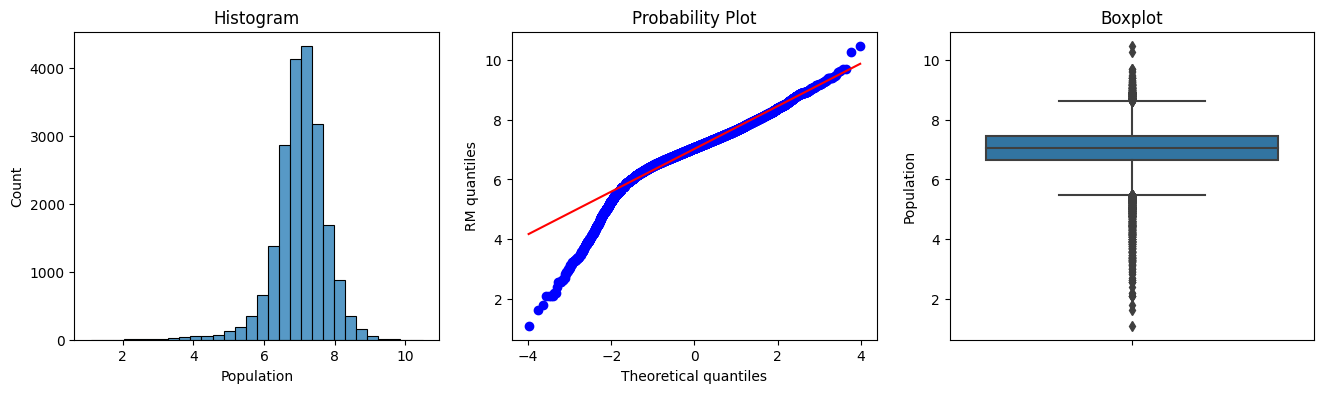

In [8]:
diagnostic_plots(X, 'Population')

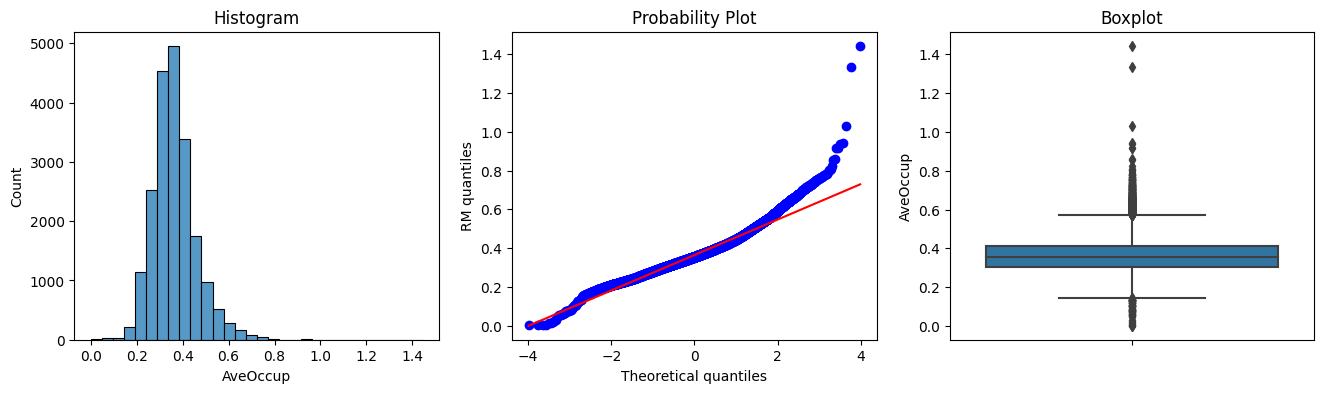

In [9]:
diagnostic_plots(X, 'AveOccup')

## Outlier detection for normally distributed variables

In [10]:
def find_normal_boundaries(df, variable):
    """Calculate the boundaries for a Gaussian distribution"""
    
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()
    return upper_boundary, lower_boundary

In [13]:
upper_boundary, lower_boundary = find_normal_boundaries(X, 'MedInc')
print(f"upper_boundary: {upper_boundary:.4f}")
print(f"ower_boundary: {lower_boundary:.4f}")

upper_boundary: 2.6564
ower_boundary: -0.1675


In [14]:
print('total number of houses: {}'.format(len(X)))

print('houses with right end outliers: {}'.format(
    len(X[X['MedInc'] > upper_boundary])))

print('houses with left end outliers: {}'.format(
    len(X[X['MedInc'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(X[X['MedInc'] > upper_boundary]) / len(X)))

print('% left end outliers: {}'.format(
    len(X[X['MedInc'] < lower_boundary]) / len(X)))

total number of houses: 20640
houses with right end outliers: 57
houses with left end outliers: 72

% right end outliers: 0.002761627906976744
% left end outliers: 0.0034883720930232558


## Outlier detection for skewed variables

In [15]:
def find_skewed_boundaries(df, variable, distance):

    # the parameter "distance" gives us the option to
    # estimate 1.5 times or 3 times the IQR when defining
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [16]:
upper_boundary, lower_boundary = find_skewed_boundaries(X, 'Population', 1.5)
print(f"upper_boundary: {upper_boundary:.4f}")
print(f"ower_boundary: {lower_boundary:.4f}")

upper_boundary: 8.6301
ower_boundary: 5.4911


In [17]:
# Inspect the number and percentage of outliers in Population.

print('total number of houses: {}'.format(len(X)))

print('houses with right end outliers: {}'.format(
    len(X[X['Population'] > upper_boundary])))

print('houses with left end outliers: {}'.format(
    len(X[X['Population'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(X[X['Population'] > upper_boundary]) / len(X)))

print('% left end outliers: {}'.format(
    len(X[X['Population'] < lower_boundary]) / len(X)))

total number of houses: 20640
houses with right end outliers: 230
houses with left end outliers: 617

% right end outliers: 0.011143410852713179
% left end outliers: 0.029893410852713177
